# Defining ODE layers in Jax

In [1]:
!pip install jax jaxlib flax

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 680 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 46.2 MB 717 kB/s eta 0:00:012     |██████████████████████▊         | 32.8 MB 4.3 MB/s eta 0:00:04
     |████████████████████████████████| 183 kB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 118 kB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 4.3 MB/s eta 0:00:01
  Created wheel for jax: filename=jax-0.2.16-py3-none-any.whl size=784392 sha256=95ad24ef89ca38f068f42be326b949d5525def392c0e6c80cd96c76a64e1a2a9
  Stored in directory: /home/dommiketa/.cache/pip/wheels/1d/bd/78/aaa554c33eb6d6e44454fdddbddb67c74a4455f648f1cdedb7
Successfully built jax
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' comman

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

import jax.numpy as jnp
from jax import nn

def w1(z1,z2): return jnp.sin(2*jnp.pi*z1/4.)
def w2(z1,z2): return 3*jnp.exp(-.5*(z1-1)**2/.36)
def w3(z1,z2): return 3*nn.sigmoid((z1-1)/.3)

def U1(z1,z2): return 0.5*((jnp.linalg.norm(jnp.stack((z1,z2), axis=-1), axis=-1)-2)/.4)**2 - jnp.log(jnp.exp(-.5*((z1-2/.6))**2) + jnp.exp(-.5*((z1+2/.6))**2))
def U4(z1,z2): return -jnp.log(jnp.exp(-.5*((z2-w1(z1,z2))/.4)**2) + jnp.exp(-.5*((z2-w1(z1,z2)+w3(z1,z2))/.35)**2))

def f(U,z1,z2): return jnp.exp(-U(z1,z2))

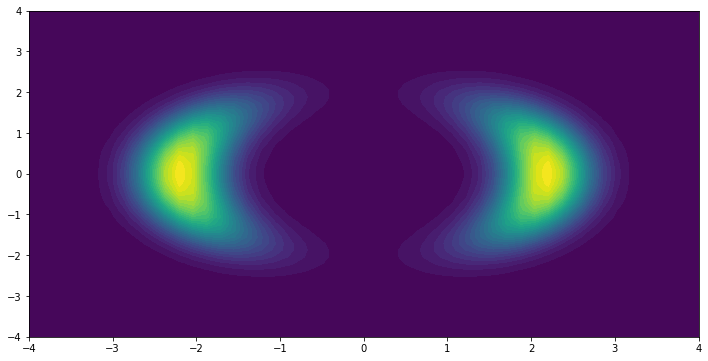

In [48]:
xs = ys = jnp.linspace(-4,4)

fig = plt.figure(figsize=(12,6))
xgrid,ygrid = jnp.meshgrid(xs,ys)
Us = U1(xgrid,ygrid)
zs = jnp.exp(-Us)
plot = plt.contourf(xgrid,ygrid,zs,30)

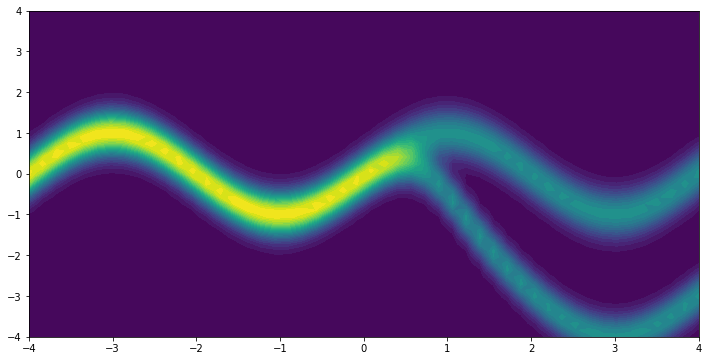

In [49]:
xs = ys = jnp.linspace(-4,4)

fig = plt.figure(figsize=(12,6))
xgrid,ygrid = jnp.meshgrid(xs,ys)
Us = U4(xgrid,ygrid)
zs = jnp.exp(-Us)
plot = plt.contourf(xgrid,ygrid,zs,30)